## BBC News Classification Using LSTM

In [1]:
#Importing necessery libraries
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
## Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anahi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Load the BBC news dataset
df = pd.read_csv("bbc_text_cls.csv")

In [4]:
print(df['labels'].value_counts())

labels
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


In [5]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [7]:
# Making a function for cleaning the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return " ".join([w for w in text.split() if w not in stop_words])
df['clean_text'] = df['text'].apply(clean_text)

In [8]:
# Converting category labels to numeric labels
le = LabelEncoder()

In [9]:
df['label'] = le.fit_transform(df['labels'])

In [10]:
num_classes = df['label'].nunique()

In [11]:
print("Classes:", le.classes_)

Classes: ['business' 'entertainment' 'politics' 'sport' 'tech']


In [12]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, stratify=df['label'], random_state=42)

In [13]:
MAX_WORDS = 20000

In [14]:
MAX_LEN = 300

In [15]:
# Tokenize and convert texts to sequences
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

In [16]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [17]:
# Padding all sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post')

In [18]:
# One-hot encode
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

In [19]:
# Defining LSTM-based text classification model
model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')])

C:\Users\anahi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
# Compiling the model 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Training the model
history = model.fit(X_train_pad, y_train_cat, epochs=30, batch_size=32, validation_split=0.1)

Epoch 1/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 31s 491ms/step - accuracy: 0.2228 - loss: 1.5998 - val_accuracy: 0.2697 - val_loss: 1.5966
Epoch 2/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 425ms/step - accuracy: 0.2893 - loss: 1.5766 - val_accuracy: 0.2753 - val_loss: 1.5424
Epoch 3/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 442ms/step - accuracy: 0.2854 - loss: 1.5541 - val_accuracy: 0.3146 - val_loss: 1.5292
Epoch 4/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 448ms/step - accuracy: 0.3245 - loss: 1.4878 - val_accuracy: 0.3258 - val_loss: 1.5127
Epoch 5/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 434ms/step - accuracy: 0.3334 - loss: 1.4607 - val_accuracy: 0.3708 - val_loss: 1.4401
Epoch 6/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 40s 418ms/step - accuracy: 0.3351 - loss: 1.4180 - val_accuracy: 0.3483 - val_loss: 1.4332
Epoch 7/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 418ms/step - accuracy: 0.3469 - loss: 1.3915 - val_accuracy: 0.3315 - val_loss: 1.4443
Epoch 8/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 430ms/step - accuracy: 0.3544 - loss: 1.3855 - val_accu

In [22]:
# Evaluating the model on the test set
loss, acc = model.evaluate(X_test_pad, y_test_cat)
print(f"Test Accuracy: {acc:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - accuracy: 0.6428 - loss: 1.1880
Test Accuracy: 0.6562


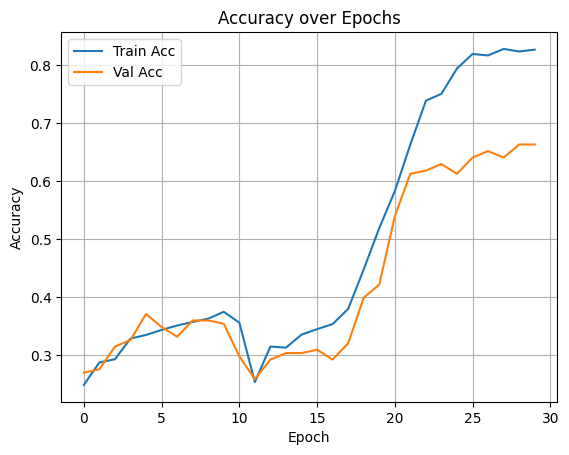

In [23]:
# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
# Predicting probabilities
y_pred = model.predict(X_test_pad)

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step


In [26]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [27]:
y_true = np.argmax(y_test_cat, axis=1)

In [28]:
# Computing the confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

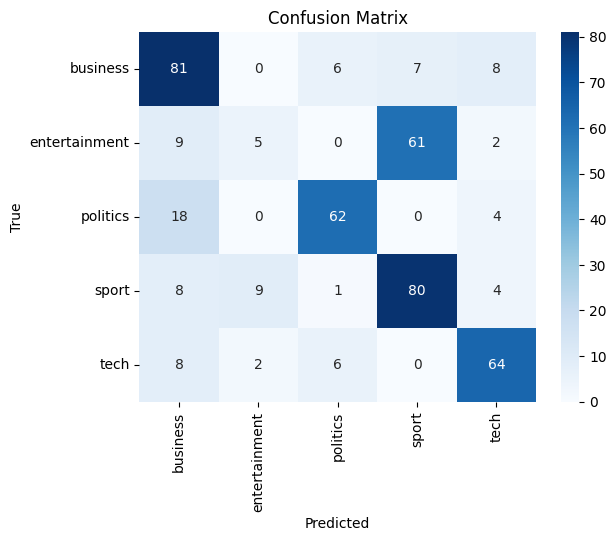

In [29]:
# Displaying the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [30]:
print(classification_report(y_true, y_pred_labels, target_names=le.classes_))

               precision    recall  f1-score   support

     business       0.65      0.79      0.72       102
entertainment       0.31      0.06      0.11        77
     politics       0.83      0.74      0.78        84
        sport       0.54      0.78      0.64       102
         tech       0.78      0.80      0.79        80

     accuracy                           0.66       445
    macro avg       0.62      0.64      0.61       445
 weighted avg       0.62      0.66      0.62       445

